### Importing necessary libraries and packages

In [241]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error # accuracy metric
from joblib import dump
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
df = pd.read_csv("Point_Values.csv")
df.head()

,Points,Values
0,-3,-4143
1,-2,-338
2,-1,-7
3,0,0
4,1,1


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Points  8 non-null      int64
 1   Values  8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [244]:
df.describe()

,Points,Values
count,8.00000,8.0000
mean,0.50000,605.0000
std,2.44949,3546.0759
min,-3.00000,-4143.0000
25%,-1.25000,-89.7500
50%,0.50000,0.5000
75%,2.25000,195.7500
max,4.00000,8548.0000


In [245]:
df.isnull().sum()

Points    0
Values    0
dtype: int64

In [246]:
df.columns

Index(['Points', 'Values'], dtype='object')

In [247]:
df.corr()

,Points,Values
Points,1.000000,0.776612
Values,0.776612,1.000000


In [248]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

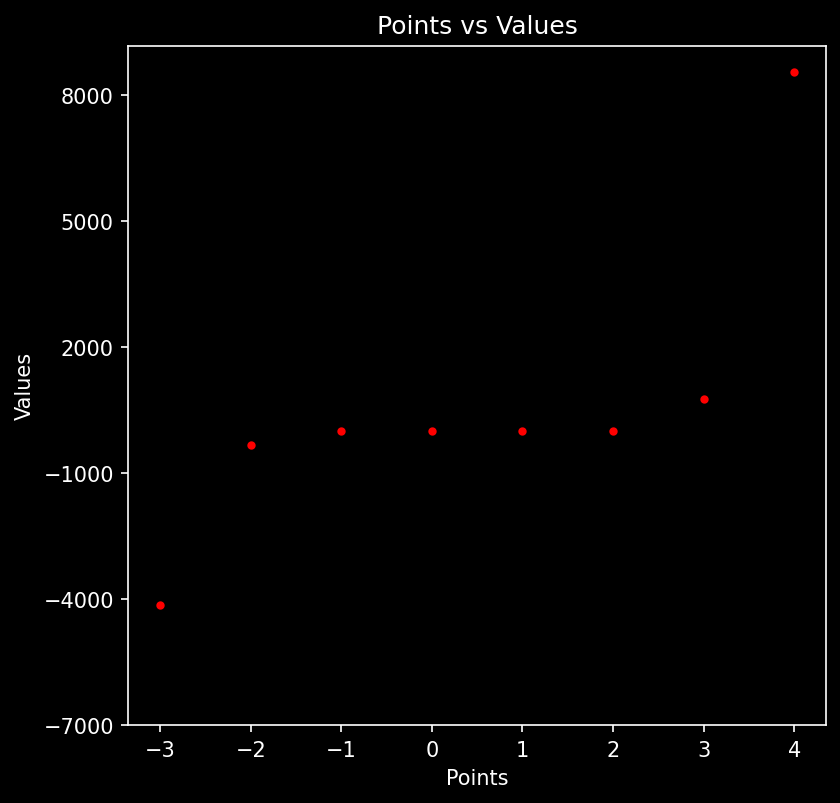

In [249]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Points = df['Points']
Values = df['Values']
plt.scatter(Points, Values, marker=".", color="red")
plt.xticks(np.arange(-3, 5, 1))
plt.yticks(np.arange(-7000,9000,3000))
plt.title("Points vs Values")
plt.xlabel("Points")
plt.ylabel("Values")
plt.savefig("Images/Points_vs_Values.png",bbox_inches='tight')

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [251]:
svr = SVR(kernel='poly', C=1000, gamma=0.1, degree=3)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [252]:
# Printing the coefficient of determination of the regression
print("The coefficient of determination :", r2_score(y_test,y_pred))
adjusted_r2_score = 1 - ((1-r2_score(y_test,y_pred))*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : nan
The adjusted coefficient of determination : nan


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


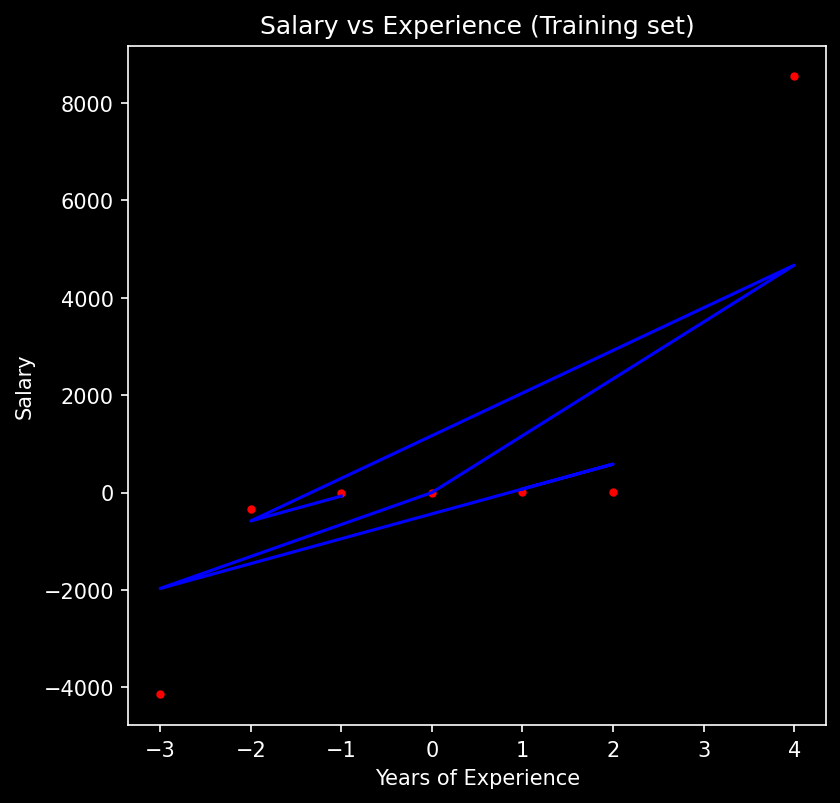

In [253]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X_train, y_train, marker=".", color='red')
plt.plot(X_train, svr.predict(X_train), color='blue')
# plt.xticks(np.arange(1, 12, 1))
# plt.yticks(np.arange(37000,128000,10000))
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig("Images/Training_set.png",bbox_inches='tight')

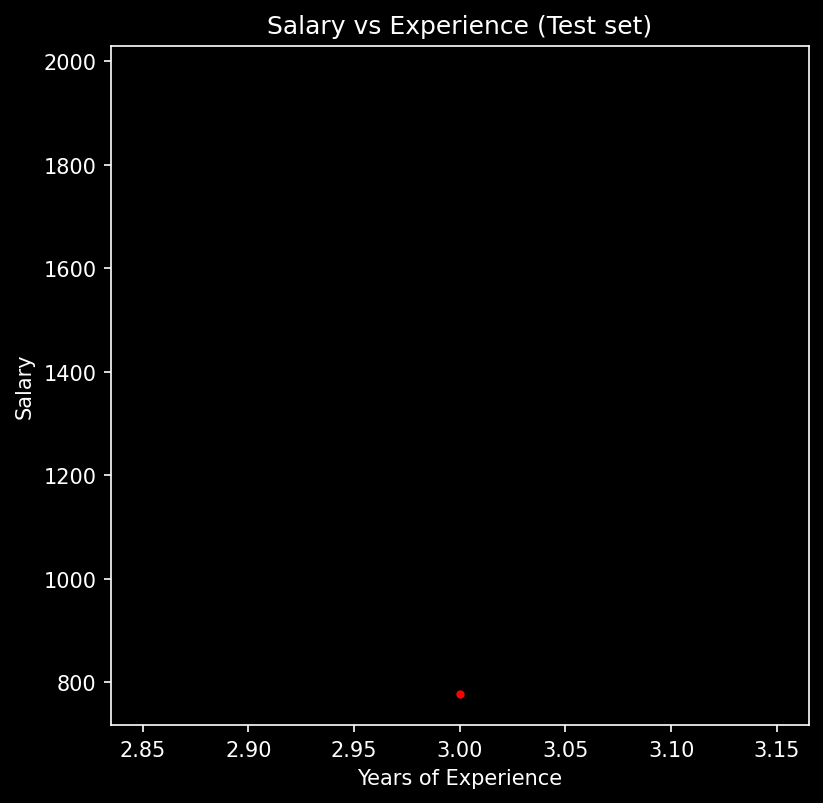

In [254]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X_test, y_test, marker=".", color='red')
plt.plot(X_test, svr.predict(X_test), color = 'blue')
# plt.xticks(np.arange(1, 12, 1))
# plt.yticks(np.arange(37000,128000,10000))
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig("Images/Test_set.png",bbox_inches='tight')

In [255]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Squared Log Error (MSLE) :', mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Log Error (RMSLE) :', mean_squared_log_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 1194.000000000001
Mean Squared Error (MSE) : 1425636.000000002
Root Mean Squared Error (RMSE) : 1194.000000000001
Mean Squared Log Error (MSLE) : 0.8650432463612856
Root Mean Squared Log Error (RMSLE) : 0.9300770109841903
Mean Absolute Percentage Error (MAPE) : 1.5366795366795378


In [256]:
dump(svr, 'supportVectorRegressor.joblib')

['supportVectorRegressor.joblib']